<a href="https://colab.research.google.com/github/awayeseullee/awayeseullee/blob/main/%EC%A0%9C%EC%A1%B0_%EA%B8%88%EC%9C%B5_%EA%B2%8C%EC%9E%84_%EB%8F%84%EB%A9%94%EC%9D%B8_%EB%B6%84%EC%84%9D_%EB%B0%8F_%EC%8B%9C%EA%B0%81%ED%99%94_EDA_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **🔒 [제조] Practice**
---
* **제조 데이터(Time Series, 시계열)를 대상으로 분석 및 시각화 하기**

* 데이터 명세 ⬇

|Column|Description|
|:---|:---|
|datetime|시간|
|Accelerometer1RMS|진동 가속도1|
|Accelerometer2RMS|진동 가속도2|
|Current |전기모터 암페어(Ampere)|
|Pressure|워터 펌프 후 루프의 압력(Bar) |
|Temperature|엔진의 온도(섭씨 온도)|
|Thermocouple|순환 루프에서 유체의 온도(섭씨 온도)|
|Voltage|전기 모터의 전압(Volt)|
|RateRMS|루프 내부의 유체의 순환 유량(Liter/min)|
|anomaly|이상여부|
|changepoint|변경점 여부|

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/[패캠] 데이터분석 강의/[패캠] 데이터분석 과제_4주차/example_1.csv', sep=";")
df.head()

,datetime,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS,anomaly,changepoint
0,2020-03-09 16:16:30,0.027545,0.041127,0.673506,0.054711,67.8345,24.3164,240.513,32.0,0.0,0.0
1,2020-03-09 16:16:31,0.027997,0.039100,0.772264,0.054711,67.8704,24.3279,229.523,32.0,0.0,0.0
2,2020-03-09 16:16:32,0.028418,0.038872,0.675520,0.054711,67.7882,24.3261,242.708,32.0,0.0,0.0
3,2020-03-09 16:16:33,0.027625,0.039366,0.566279,-0.273216,67.7918,24.3323,229.709,32.0,0.0,0.0
4,2020-03-09 16:16:34,0.027484,0.041854,1.292170,0.054711,67.7368,24.3250,242.746,32.0,0.0,0.0


### Question 01

```
Data Read하고 상위 전처리 조건을 적용한 DataFrame 만들기

  (1) Data shape(형태) 출력 → 전체 데이터의 Row와 Column개수 출력

  (2) Data type 확인 → 각 Column별 Data Type 출력

  (3) Null값 확인 (※ 빈 값의 Data) → 각 Column별 Null Value의 개수 출력
```

In [ ]:
df.describe()

,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS,anomaly,changepoint
count,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000
mean,0.027663,0.040037,1.195240,0.048541,67.895174,24.265096,229.924824,31.472275,0.313264,0.003763
std,0.000333,0.001086,7.113407,0.270689,0.695198,0.021573,13.259556,1.314535,0.464039,0.061256
min,0.026455,0.036972,0.394058,-0.929070,66.201900,24.217000,0.580776,28.040000,0.000000,0.000000
25%,0.027434,0.039276,0.753505,0.054711,67.412450,24.252950,223.570000,31.039050,0.000000,0.000000
50%,0.027674,0.040098,1.002720,0.054711,67.955000,24.267200,230.634000,32.000000,0.000000,0.000000
75%,0.027892,0.040828,1.194580,0.054711,68.515500,24.277450,236.960000,32.038900,1.000000,0.000000
max,0.028554,0.043122,232.734000,1.038490,69.098200,24.332300,254.125000,33.000000,1.000000,1.000000


In [ ]:
# 1번_Data shape(형태) 출력 → 전체 데이터의 Row와 Column개수 출력

df.shape

(1063, 11)

In [ ]:
# 2번_Data type 확인 → 각 Column별 Data Type 출력

df.dtypes

datetime                object
Accelerometer1RMS      float64
Accelerometer2RMS      float64
Current                float64
Pressure               float64
Temperature            float64
Thermocouple           float64
Voltage                float64
Volume Flow RateRMS    float64
anomaly                float64
changepoint            float64
dtype: object

In [ ]:
# df.info() -> 데이터 타입, Null값 함께 확인 가능 + 기본적인 데이터 현황 한 번에 확인 가능

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1063 entries, 0 to 1062
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   datetime             1063 non-null   object 
 1   Accelerometer1RMS    1063 non-null   float64
 2   Accelerometer2RMS    1063 non-null   float64
 3   Current              1063 non-null   float64
 4   Pressure             1063 non-null   float64
 5   Temperature          1063 non-null   float64
 6   Thermocouple         1063 non-null   float64
 7   Voltage              1063 non-null   float64
 8   Volume Flow RateRMS  1063 non-null   float64
 9   anomaly              1063 non-null   float64
 10  changepoint          1063 non-null   float64
dtypes: float64(10), object(1)
memory usage: 91.5+ KB


In [ ]:
# 3번_Null값 확인 (※ 빈 값의 Data) → 각 Column별 Null Value의 개수 출력

df.isnull().sum()

datetime               0
Accelerometer1RMS      0
Accelerometer2RMS      0
Current                0
Pressure               0
Temperature            0
Thermocouple           0
Voltage                0
Volume Flow RateRMS    0
anomaly                0
changepoint            0
dtype: int64

### Question 02

```
01번 문제에서 Read한 데이터를 활용하여 시각화 진행하기

  (1) 전체 데이터의 개수에서 'anomaly'가 차지하는 비율
  
  (2) 'Accelerometer1RMS','Accelerometer2RMS','Current','Pressure','Temperature','Thermocouple','Voltage','Volume Flow RateRMS'
  총 8개의 Column 대상으로 총 8개의 Trend 그래프 시각화
  (※ x = 'datetime', y= 각 Column)

  (3) 시각화한 Trend 그래프 위에 'anomaly'가 1인 데이터에 대해서 이상 포인트를 표시하기

```

### 전체 데이터의 개수에서 'anomaly'가 차지하는 비율 **약 31%**

In [ ]:
df[df["anomaly"]==1]

# anomaly 개수 = 333개

,datetime,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS,anomaly,changepoint
560,2020-03-09 16:26:30,0.027489,0.040797,1.162620,-0.273216,67.4538,24.2726,231.836,32.0000,1.0,1.0
561,2020-03-09 16:26:31,0.028236,0.040921,0.478813,0.382638,67.5373,24.2795,219.732,31.9615,1.0,0.0
562,2020-03-09 16:26:32,0.028028,0.040447,1.212860,0.054711,67.6272,24.2728,230.915,31.0397,1.0,0.0
563,2020-03-09 16:26:33,0.027633,0.041229,0.953656,0.382638,67.6784,24.2831,215.346,32.0396,1.0,0.0
564,2020-03-09 16:26:34,0.027954,0.040867,1.139300,0.054711,67.6033,24.2773,219.743,32.9615,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
888,2020-03-09 16:33:25,0.027327,0.039147,0.846175,0.710565,66.4771,24.2400,238.852,32.0404,1.0,0.0
889,2020-03-09 16:33:26,0.027102,0.037518,1.250500,0.054711,66.5466,24.2347,225.364,32.9608,1.0,0.0
890,2020-03-09 16:33:27,0.027542,0.037979,1.233640,0.054711,66.3557,24.2300,222.442,32.0000,1.0,0.0
891,2020-03-09 16:33:28,0.027083,0.038606,1.333360,0.054711,66.5840,24.2407,251.784,32.0000,1.0,0.0


In [ ]:
333/len(df)
# 약 31%

0.31326434619002824

In [ ]:
# (normalize=True) : 비율로 바로 계산할 때 사용

df['anomaly'].value_counts(normalize=True)

0.0    0.686736
1.0    0.313264
Name: anomaly, dtype: float64

### 8개 Trend graph 시각화 및 anomaly 표시

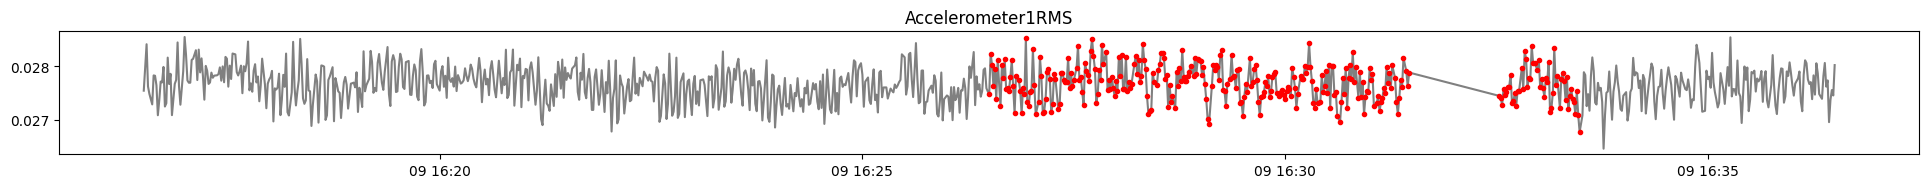

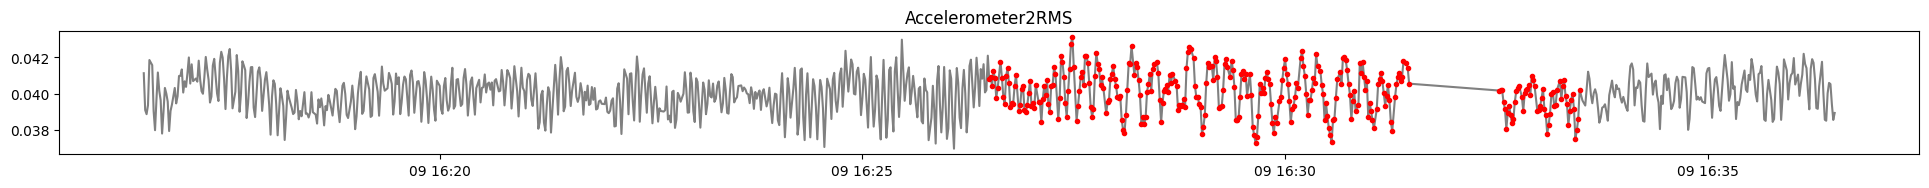

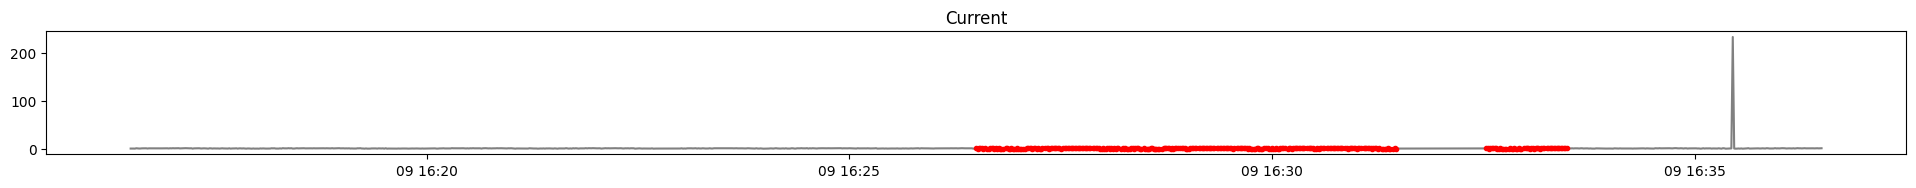

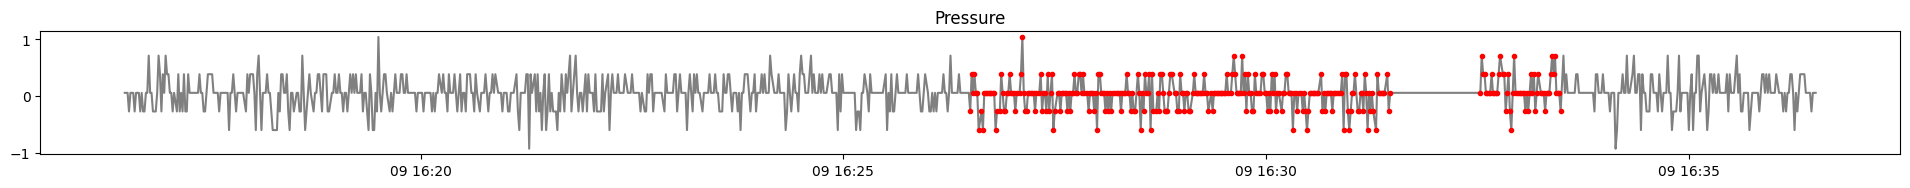

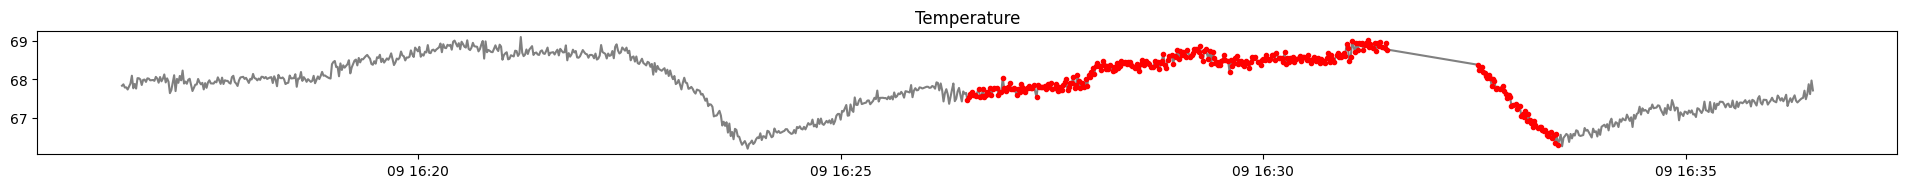

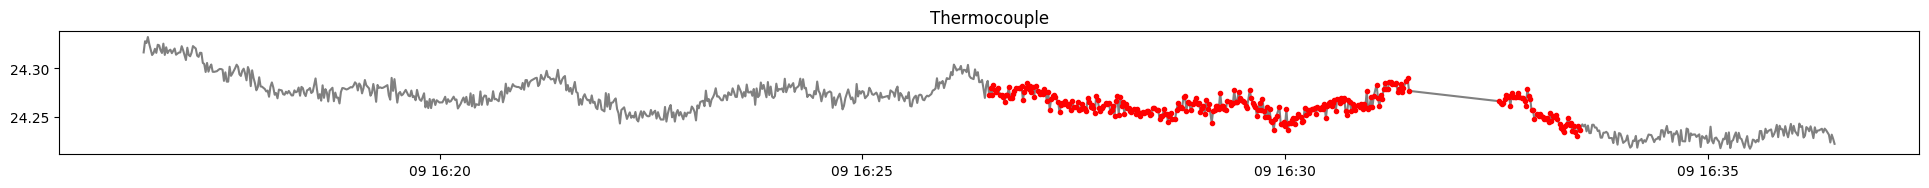

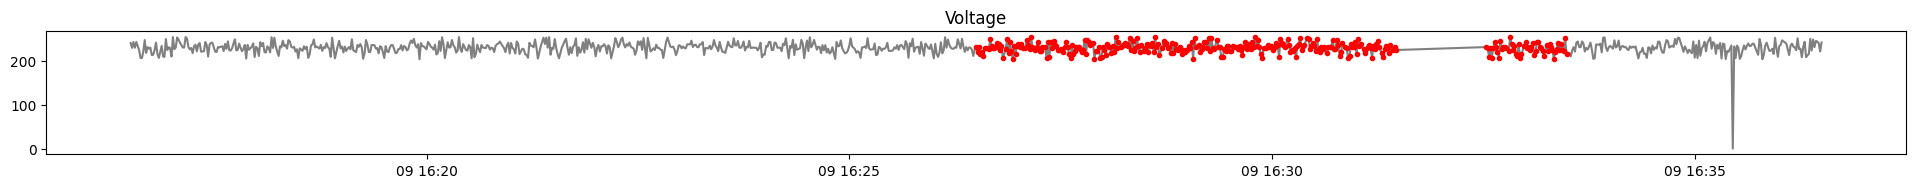

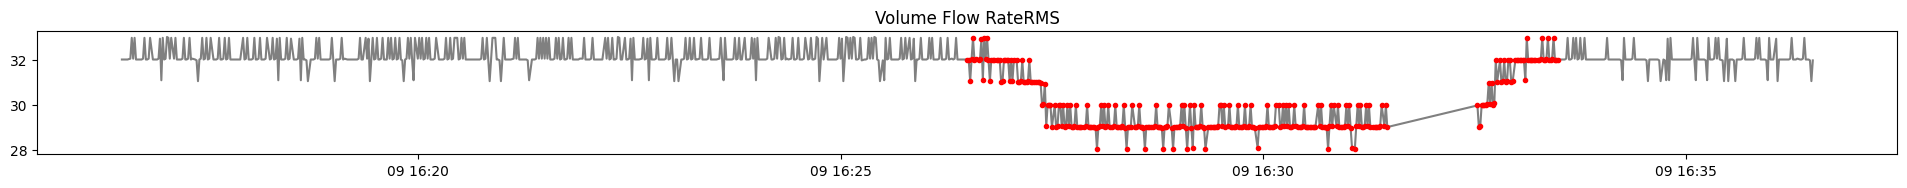

In [ ]:
import matplotlib.pyplot as plt


df['datetime'] = pd.to_datetime(df['datetime'])


for v, i in  enumerate(df.columns[1:9]) :
  plt.figure(figsize=(24,15))
  plt.subplot(8, 1, v+1)
  plt.plot(df['datetime'], df[i], color='grey');
  plt.plot(df[df['anomaly']==1]['datetime'], df[df['anomaly']==1][i], 'o', color='red', markersize=3 );
  plt.title(i)

In [ ]:
# Current 1002행 "232.734000"으로 anomaly는 아니었으나 이상치 데이터로 간주하여 삭제 후 그래프 생성함

df.drop(df.index[1002], axis=0, inplace=True)

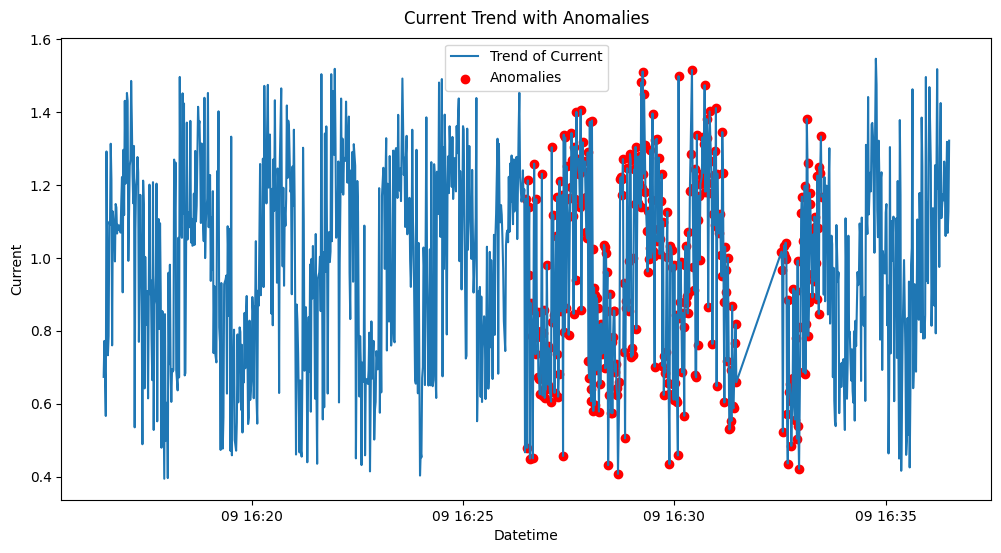

In [ ]:
import seaborn as sns
df['datetime'] = pd.to_datetime(df['datetime'])

# Plotting the trend graph
plt.figure(figsize=(12, 6))
sns.lineplot(x='datetime', y='Current', data=df, label='Trend of Current')

# Highlighting anomalies
anomaly_points = df[df['anomaly'] == 1]
plt.scatter(anomaly_points['datetime'], anomaly_points['Current'], color='red', label='Anomalies')

# Customizing the plot
plt.title('Current Trend with Anomalies', pad=10)
plt.xlabel('Datetime')
plt.ylabel('Current')
plt.legend()
#plt.grid(True)
plt.show()